<a href="https://colab.research.google.com/github/tony85br/henry_ford_tribute_page/blob/main/Images_Preprocesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh                         2.3.3
branca

In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data1'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [7]:
data_dir

'data1'

In [8]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [9]:
os.listdir(data_dir)

['happy-ppl', 'sad-ppl']

In [10]:
for image_class in os.listdir(data_dir):
  print(image_class)
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
#os.remove(image_path)

happy-ppl
sad-ppl


In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data1')

Found 164 files belonging to 2 classes.


In [13]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
#Class 1 = sad
#Class 0 = happy
from tensorflow.python.ops.gen_batch_ops import batch
batch = data_iterator.next()

In [16]:
len(batch)

2

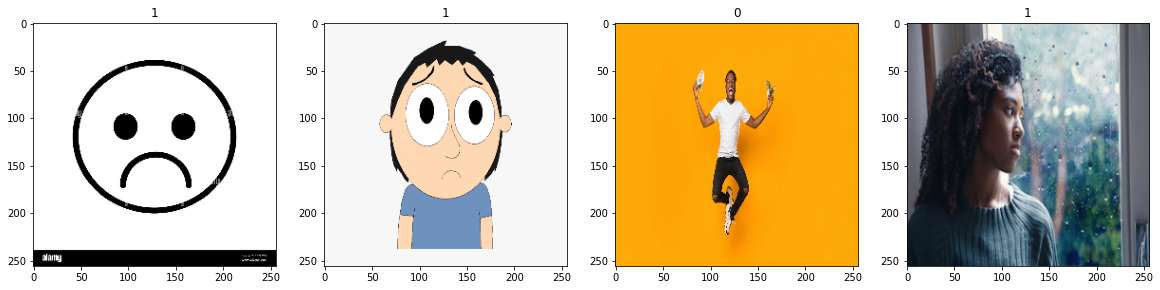

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [18]:
#Preprocess Data
#scale data
data = data.map(lambda x,y: (x/255, y))
scaler_iterator = data.as_numpy_iterator()

In [20]:
batch = scaler_iterator.next()

In [21]:
batch[0].min()

0.0

In [22]:
len(data)

6

In [23]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [24]:
train_size+val_size+test_size

6

In [25]:
train_size

3

In [26]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [27]:
len(test)

1

In [28]:
#Deep Model
#Built Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, (3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())


model.add(Conv2D(32, (3,3),1, activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())


model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Create logs folder
 Train

In [33]:
#Train
logdir = 'logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 7s 1s/step - loss: 1.2492 - accuracy: 0.5000 - val_loss: 0.8906 - val_accuracy: 0.4531
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 0.8591 - accuracy: 0.4062 - val_loss: 0.6949 - val_accuracy: 0.5469
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.7081 - accuracy: 0.4688 - val_loss: 0.6860 - val_accuracy: 0.6406
Epoch 4/20
3/3 [==============================] - 3s 818ms/step - loss: 0.6831 - accuracy: 0.6771 - val_loss: 0.6764 - val_accuracy: 0.7969
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 0.6608 - accuracy: 0.7812 - val_loss: 0.6352 - val_accuracy: 0.7500
Epoch 6/20
3/3 [==============================] - 3s 835ms/step - loss: 0.6337 - accuracy: 0.6771 - val_loss: 0.5418 - val_accuracy: 0.7500
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.5704 - accuracy: 0.6667 - val_loss: 0.4841 - val_accuracy: 0.7656
Epoch 8/20
3/3 [===================

Plot Performance

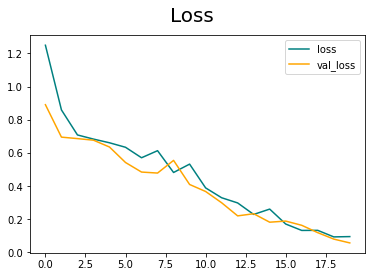

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

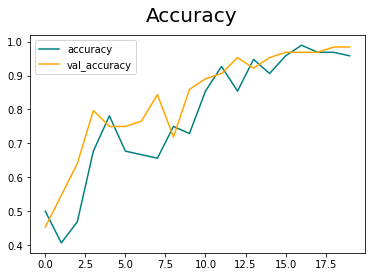

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

Evaluate Performance

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
len(test)

1

In [41]:
for batch in test.as_numpy_iterator():
  x, y = batch
  yhat = model.predict(x)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 204ms/step


In [42]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0




Test with an image not seen for our model



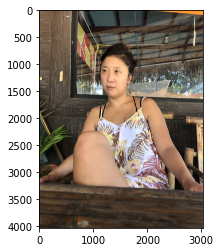

In [43]:
img = cv2.imread('/content/happy.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
resize = tf.image.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (256,256))

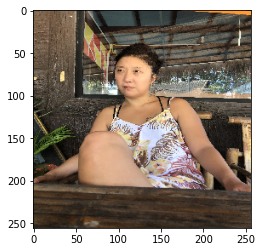

In [45]:
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 90ms/step


In [47]:
yhat

array([[0.0533372]], dtype=float32)

In [48]:
if yhat > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Happy


Save the Model

In [49]:
from tensorflow.keras.models import load_model

In [50]:
model.save(os.path.join('models', 'happysadmodel.h5'))

Reload the model

In [51]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [52]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 62ms/step


In [53]:
yhatnew

array([[0.0533372]], dtype=float32)

In [54]:
if yhatnew > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Happy
